In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [2]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [4]:
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

In [6]:
model.compile(loss="mean_squared_error", 
            optimizer = keras.optimizers.SGD(lr=1e-3),
            metrics = ['mae'])

In [8]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.3947 - mae: 0.4486 - val_loss: 0.3758 - val_mae: 0.4373
Epoch 2/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.3923 - mae: 0.4478 - val_loss: 0.3666 - val_mae: 0.4295
Epoch 3/20
11610/11610 [==============================] - 1s 61us/sample - loss: 0.3898 - mae: 0.4454 - val_loss: 0.3649 - val_mae: 0.4305
Epoch 4/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.3873 - mae: 0.4444 - val_loss: 0.3623 - val_mae: 0.4268
Epoch 5/20
11610/11610 [==============================] - 1s 62us/sample - loss: 0.3851 - mae: 0.4426 - val_loss: 0.3615 - val_mae: 0.4263
Epoch 6/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.3827 - mae: 0.4404 - val_loss: 0.3590 - val_mae: 0.4268
Epoch 7/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.3803 - mae: 0.4401 - val_loss: 0.3

In [9]:
mae_test = model.evaluate(X_test,y_test)

In [10]:
model_history.history

{'loss': [0.3947070919009347,
  0.3922769972366264,
  0.3897686025533668,
  0.38726005661626195,
  0.3850787088031095,
  0.38268500666080313,
  0.38030753937597217,
  0.3786127851555616,
  0.3765435923696283,
  0.3746875212738783,
  0.37276261181897075,
  0.3710735721386886,
  0.36954845857455954,
  0.36833741124799596,
  0.36666162312800876,
  0.36543722717952976,
  0.3644434817590968,
  0.3629574676252048,
  0.36198405379575455,
  0.36091953381498143],
 'mae': [0.44862583,
  0.44783032,
  0.44544822,
  0.44435832,
  0.4425801,
  0.44044545,
  0.44014227,
  0.4381226,
  0.43744817,
  0.4357492,
  0.4346457,
  0.4335838,
  0.43263423,
  0.4317657,
  0.43091568,
  0.42964503,
  0.42890456,
  0.42754036,
  0.42781606,
  0.42692095],
 'val_loss': [0.37582501909221483,
  0.36659751310366995,
  0.36493316218834515,
  0.3623400969945799,
  0.3615365185093818,
  0.3589953412150228,
  0.35624177797820217,
  0.363564863338951,
  0.35638299550504954,
  0.35061624997345975,
  0.3550348133541817,


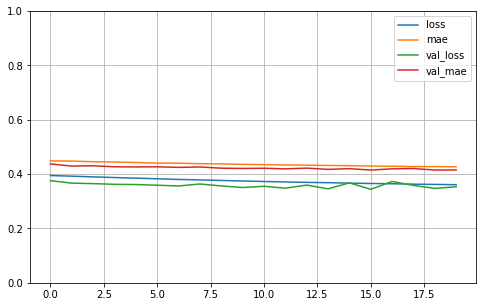

In [11]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [12]:
X_new = X_test[:3]

In [13]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.59593165]
 [1.8446032 ]
 [3.7808695 ]]
[0.477   0.458   5.00001]


In [14]:
del model

In [15]:
keras.backend.clear_session()

In [16]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_], outputs = [output])

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [18]:
model.compile(loss="mean_squared_error", 
            optimizer = keras.optimizers.SGD(lr=1e-3),
            metrics = ['mae'])

In [19]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/40
11610/11610 [==============================] - 1s 99us/sample - loss: 1.6833 - mae: 0.9074 - val_loss: 0.7870 - val_mae: 0.6011
Epoch 2/40
11610/11610 [==============================] - 1s 65us/sample - loss: 0.6810 - mae: 0.6000 - val_loss: 0.6489 - val_mae: 0.5738
Epoch 3/40
11610/11610 [==============================] - 1s 68us/sample - loss: 0.6261 - mae: 0.5769 - val_loss: 0.5921 - val_mae: 0.5523
Epoch 4/40
11610/11610 [==============================] - 1s 70us/sample - loss: 0.5879 - mae: 0.5583 - val_loss: 0.5435 - val_mae: 0.5333
Epoch 5/40
11610/11610 [==============================] - 1s 70us/sample - loss: 0.5577 - mae: 0.5420 - val_loss: 0.6292 - val_mae: 0.5272
Epoch 6/40
11610/11610 [==============================] - 1s 65us/sample - loss: 0.5310 - mae: 0.5289 - val_loss: 0.4943 - val_mae: 0.5070
Epoch 7/40
11610/11610 [==============================] - 1s 71us/sample - loss: 0.5118 - mae: 0.5197 - val_loss: 0.5

In [20]:
mae_test = model.evaluate(X_test, y_test)

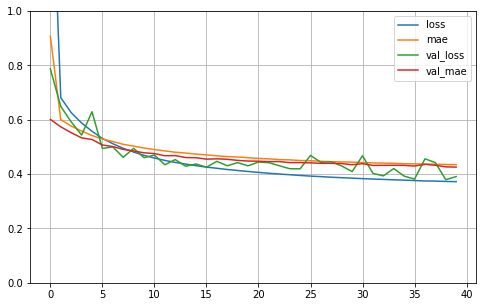

In [21]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
model.save("California_housing_model.h5")

In [25]:
del model

In [26]:
keras.backend.clear_session()

In [33]:
model = keras.models.load_model("California_housing_model.h5")

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [30]:
y_pred = model.predict(X_new)
print(y_pred)

[[0.78344566]
 [1.7348332 ]
 [3.7177854 ]]


Using callacks to save model aftear each epoch

In [34]:
del model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [35]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

In [36]:
model.compile(loss="mse", optimizer = keras.optimizers.SGD(lr=1e-3))

In [44]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("california_model_checkpoints/Model-{epoch:02d}.h5")

In [45]:
history = model.fit(X_train, y_train, epochs=10, 
    validation_data=(X_valid, y_valid), 
    callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 60us/sample - loss: 0.5551 - val_loss: 0.5349
Epoch 2/10
11610/11610 [==============================] - 1s 58us/sample - loss: 0.5278 - val_loss: 0.5043
Epoch 3/10
11610/11610 [==============================] - 1s 58us/sample - loss: 0.5035 - val_loss: 0.5117
Epoch 4/10
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4858 - val_loss: 0.4707
Epoch 5/10
11610/11610 [==============================] - 1s 71us/sample - loss: 0.4709 - val_loss: 0.4893
Epoch 6/10
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4576 - val_loss: 0.4837
Epoch 7/10
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4481 - val_loss: 0.4219
Epoch 8/10
11610/11610 [==============================] - 1s 64us/sample - loss: 0.4391 - val_loss: 0.4237
Epoch 9/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4322 - val_l

In [46]:
del model
keras.backend.clear_session()

In [48]:
model = keras.models.load_model("california_model_checkpoints/Model-10.h5")

In [49]:
mse_test = model.evaluate(X_test, y_test)

Best model only

In [50]:
del model
keras.backend.clear_session()

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer = keras.optimizers.SGD(lr=1e-3))

In [52]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("california_model_checkpoints/Best-Model.h5", save_best_pnly=True)

In [53]:
history = model.fit(X_train, y_train, epochs=10, 
    validation_data=(X_valid, y_valid), 
    callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 4s 331us/sample - loss: 1.4530 - val_loss: 0.7972
Epoch 2/10
11610/11610 [==============================] - 1s 88us/sample - loss: 0.7402 - val_loss: 0.6640
Epoch 3/10
11610/11610 [==============================] - 1s 77us/sample - loss: 0.6512 - val_loss: 0.6182
Epoch 4/10
11610/11610 [==============================] - 1s 89us/sample - loss: 0.5951 - val_loss: 0.5563
Epoch 5/10
11610/11610 [==============================] - 1s 96us/sample - loss: 0.5534 - val_loss: 0.5014
Epoch 6/10
11610/11610 [==============================] - 1s 86us/sample - loss: 0.5197 - val_loss: 0.4723
Epoch 7/10
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4930 - val_loss: 0.4516
Epoch 8/10
11610/11610 [==============================] - 1s 100us/sample - loss: 0.4724 - val_loss: 0.4380
Epoch 9/10
11610/11610 [==============================] - 1s 96us/sample - loss: 0.4559 - val

In [57]:
model = keras.models.load_model("california_model_checkpoints/Best-Model.h5")
mse_test = model.evaluate(X_test, y_test)

EARLY STOP MODEL

In [58]:
del model
keras.backend.clear_session()

In [59]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer = keras.optimizers.SGD(lr=1e-3))

In [60]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("california_model_checkpoints/early_stop_model.h5", save_best_pnly=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights = True)

In [61]:
history = model.fit(X_train, y_train, epochs=200, 
    validation_data=(X_valid, y_valid), 
    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/200
11610/11610 [==============================] - 3s 299us/sample - loss: 1.5135 - val_loss: 1.5166
Epoch 2/200
11610/11610 [==============================] - 1s 71us/sample - loss: 0.6735 - val_loss: 0.6772
Epoch 3/200
11610/11610 [==============================] - 1s 69us/sample - loss: 0.6164 - val_loss: 0.5764
Epoch 4/200
11610/11610 [==============================] - 1s 73us/sample - loss: 0.5770 - val_loss: 0.5460
Epoch 5/200
11610/11610 [==============================] - 1s 82us/sample - loss: 0.5455 - val_loss: 0.5081
Epoch 6/200
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5186 - val_loss: 0.4876
Epoch 7/200
11610/11610 [==============================] - 1s 79us/sample - loss: 0.4966 - val_loss: 0.4633
Epoch 8/200
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4792 - val_loss: 0.4442
Epoch 9/200
11610/11610 [==============================] - 1s 70us/sample - loss: 0.46

In [62]:
model = keras.models.load_model("california_model_checkpoints/early_stop_model.h5")
mse_test = model.evaluate(X_test, y_test)